In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

data = pd.read_csv("C:\\Users\\marin\\pycharm\\Mall Customers Clustering\\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# check data types, missing values and descriptive statistics
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [3]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Text(0.5, 1.0, 'Customers Gender Frequency')

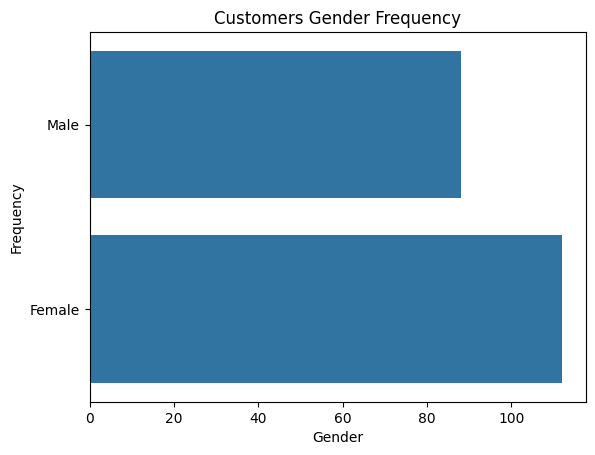

In [6]:
# visualize the frequency of male and female customers
sns.countplot(data['Gender'])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title('Customers Gender Frequency')

C:\Users\marin\AppData\Local\Temp\ipykernel_11924\1173056813.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


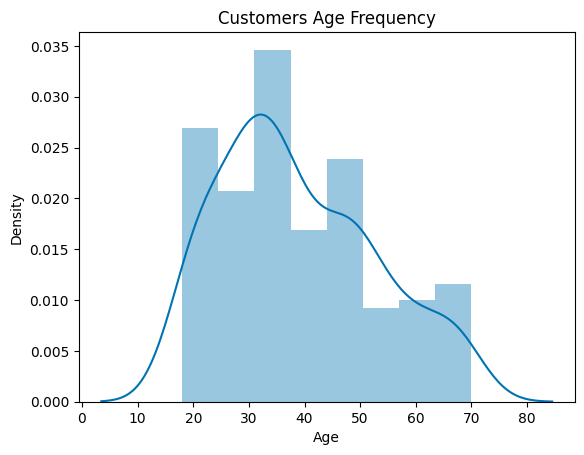

In [7]:
# age distribution visualization 
sns.set_palette('colorblind')
sns.distplot(data['Age'])
plt.title("Customers Age Frequency")
plt.show()

C:\Users\marin\AppData\Local\Temp\ipykernel_11924\2152548298.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


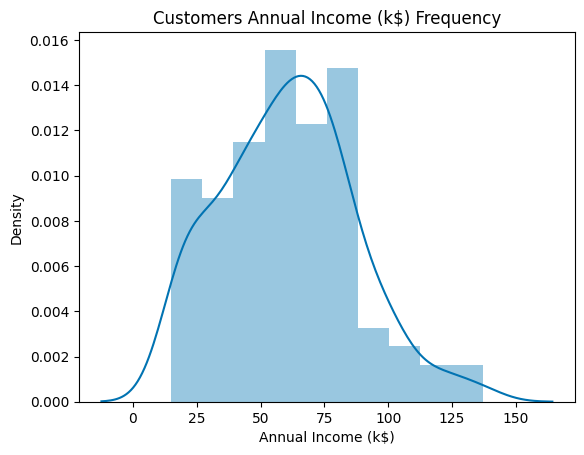

In [8]:
# annual income distribution visualization 
sns.set_palette('colorblind')
sns.distplot(data['Annual Income (k$)'])
plt.title("Customers Annual Income (k$) Frequency")
plt.show()

<Axes: >

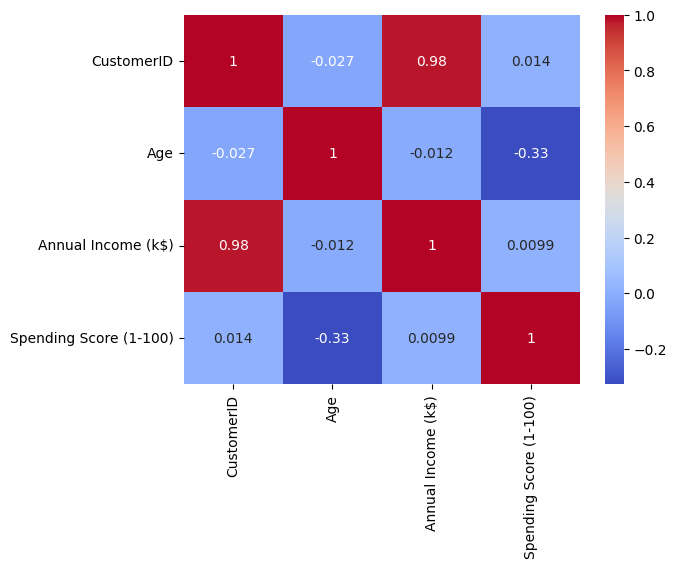

In [10]:
# correlation matrix
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
# cluster on 2 features 
df = data[['Annual Income (k$)','Spending Score (1-100)']]
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<Axes: >

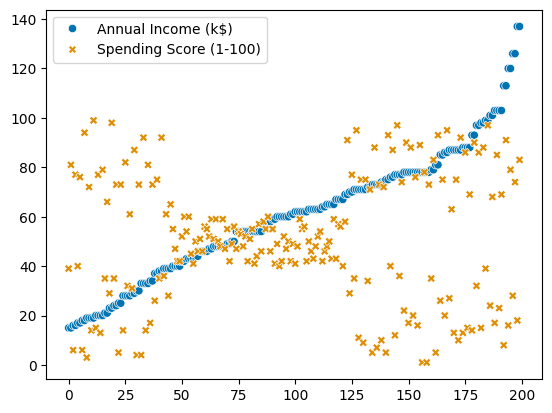

In [14]:
# df scatterplot visualization 
sns.scatterplot(df)

In [17]:
from sklearn.cluster import KMeans

errors = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    errors.append(kmeans.inertia_)

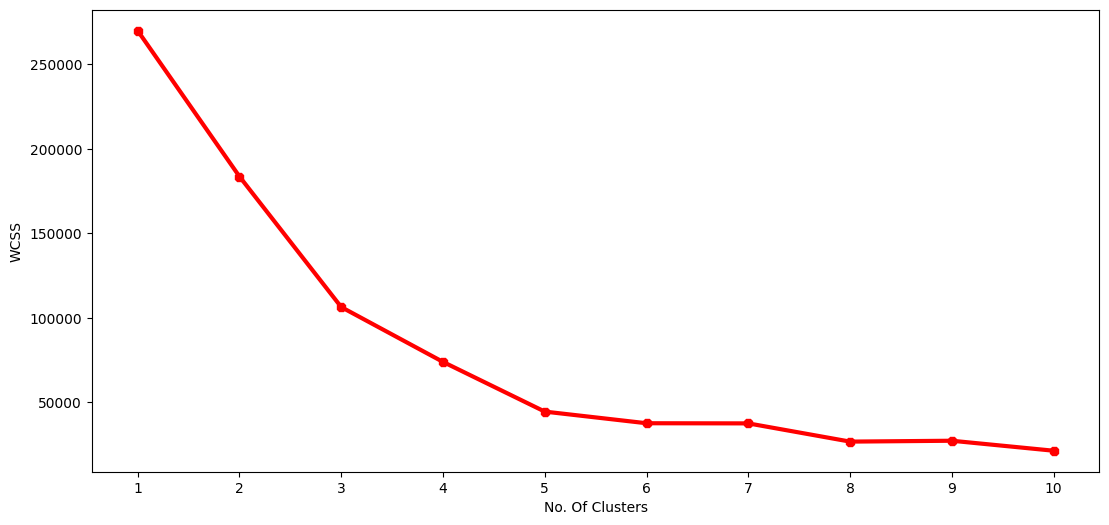

In [19]:
# plot the results for elbow method 
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel("No. Of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

In [20]:
km = KMeans(n_clusters=5)
km.fit(df)
y = km.predict(df)
df['Label'] = y
df

C:\Users\marin\AppData\Local\Temp\ipykernel_11924\2259087524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = y


,Annual Income (k$),Spending Score (1-100),Label
0,15,39,2
1,15,81,0
2,16,6,2
3,16,77,0
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

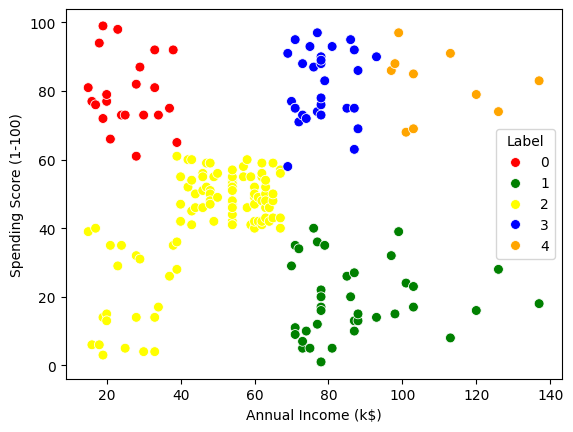

In [24]:
# visualize the results shown above 
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Label',data=df, s=50, palette=['red','green', 'yellow', 'blue', 'orange'])

In [26]:
# cluster on 3 features 
df2 = data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31
...,...,...,...
195,120,79,35
196,126,28,45
197,126,74,32
198,137,18,32


In [27]:
errors = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

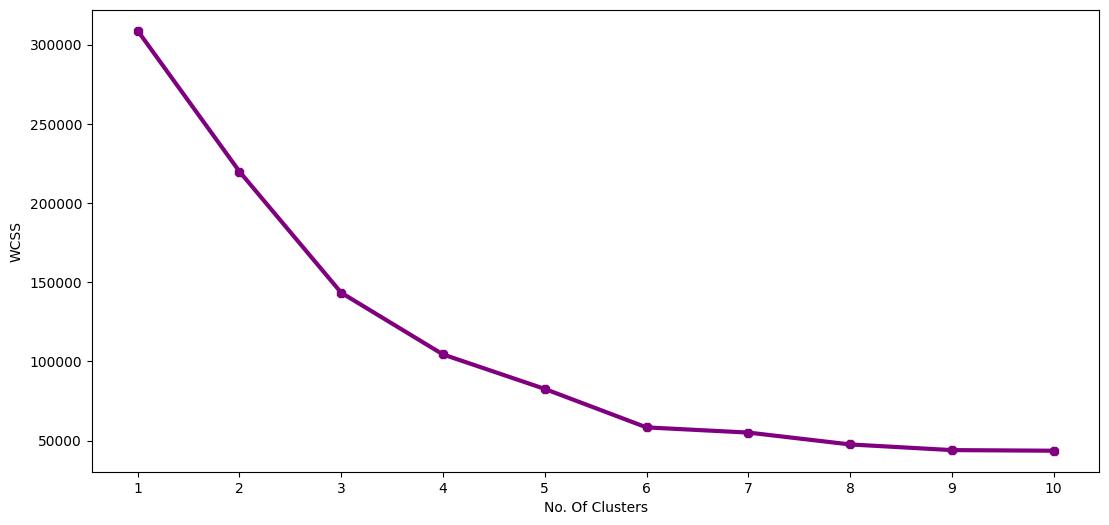

In [28]:
# plot the results for elbow method 
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='purple', marker='8')
plt.xlabel("No. Of Clusters")
plt.ylabel("WCSS")
plt.xticks(np.arange(1,11,1))
plt.show()

In [29]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2

C:\Users\marin\AppData\Local\Temp\ipykernel_11924\3620204511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Label'] = y


,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,4
1,15,81,21,1
2,16,6,20,4
3,16,77,23,1
4,17,40,31,4
...,...,...,...,...
195,120,79,35,2
196,126,28,45,3
197,126,74,32,2
198,137,18,32,3


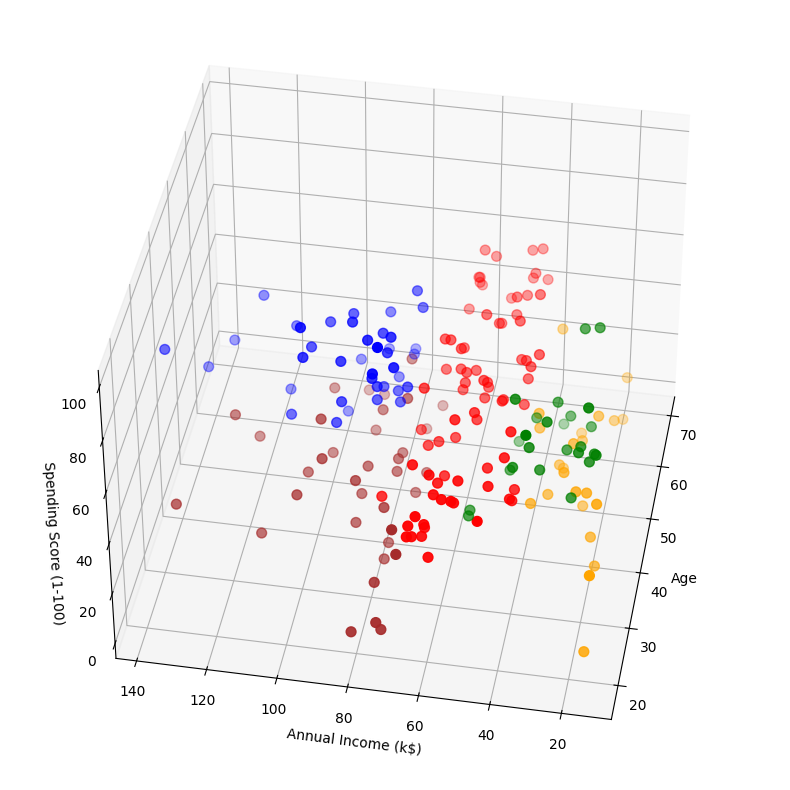

In [35]:
# 3d scatter plot 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)
ax.view_init(40,190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()